# Global Economic Pulse:Exploring Economic Indicators in the Top 47 Countries of 2020

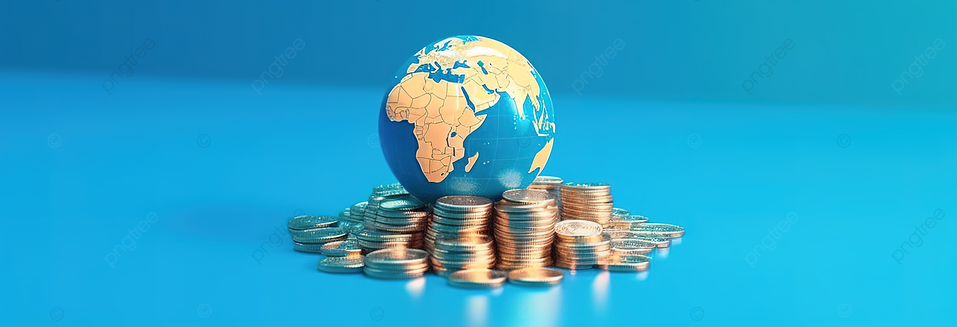

# Table of contents

* Preliminary checks and data quality assessment
<br>
<br>
* Data transformation
<br>
<br>
* GDP
<br>
<br>
* Inflation
<br>
<br>
* Unemployment
<br>
<br>
* Income taxes
<br>
<br>
* Debt
<br>
<br>
* Gold reserves
<br>
<br>
* **CONCLUSIONS**

## Preliminary checks & data quality assessment

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\Asus\Desktop\dis\2_KPIs_pe tari\World_Economic_Data_2020.csv")
data.head()

,Country,Stock_Market_Recovery,Lt_Yc,Mt_Yc,St_Yc,GDP_2019,Real_GDP_Growth,GDP_Deflator,Unemployment,Population,...,Income_Tax,Adjusted_Interest,GDP,Real_GDP,Household_Debt,Household_Debt_To_Real_GDP,Govt_Debt,Govt_Debt_To_Real_GDP,Current_Acct,Current_Acct_To_Real_GDP
0,US,-19.13,38.3,15.2,5.00,2.3,2.4,113.04,4.4,329.0,...,37.00,3.75,2.120000e+13,1.880000e+13,1.590000e+13,0.85006,2.270000e+13,1.20840,-4.880000e+13,-2.59992
1,China,-9.36,116.9,49.0,17.60,6.0,6.1,684.89,5.9,1400.0,...,45.00,0.15,1.420000e+13,2.070000e+12,7.720000e+12,3.72580,7.170000e+12,3.45869,1.420000e+13,6.84890
2,Japan,-19.83,14.4,1.2,2.10,1.7,0.9,105.40,2.4,126.0,...,55.95,4.10,5.110000e+12,4.850000e+12,2.990000e+12,0.61764,1.220000e+13,2.51168,1.790000e+13,3.68900
3,Germany,-24.55,24.0,4.8,-0.16,0.4,0.5,105.60,3.2,83.0,...,45.00,4.00,4.040000e+12,3.830000e+12,2.190000e+12,0.57341,2.420000e+12,0.63149,2.870000e+13,7.49760
4,India,-24.95,186.9,89.0,27.30,4.7,6.1,138.80,7.8,1312.0,...,35.88,0.40,2.800000e+12,2.020000e+12,3.360000e+11,0.16656,1.950000e+12,0.96633,-5.880000e+12,-2.91480


In [3]:
data.shape

(47, 27)

In [4]:
data.isnull().values.any() # checking for missing values

False

In [5]:
data.duplicated().sum() # duplicated values

0

In [6]:
data.columns

Index(['Country', 'Stock_Market_Recovery', 'Lt_Yc', 'Mt_Yc', 'St_Yc',
       'GDP_2019', 'Real_GDP_Growth', 'GDP_Deflator', 'Unemployment',
       'Population', 'Inflation', 'Food_Inflation', 'Interest',
       'Current_Acct_To_GDP', 'Gold_Tons', 'Govt_Debt_To_GDP',
       'Household_Debt_To_GDP', 'Income_Tax', 'Adjusted_Interest', 'GDP',
       'Real_GDP', 'Household_Debt', 'Household_Debt_To_Real_GDP', 'Govt_Debt',
       'Govt_Debt_To_Real_GDP', 'Current_Acct', 'Current_Acct_To_Real_GDP'],
      dtype='object')

In [7]:
data.info() # overall info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     47 non-null     object 
 1   Stock_Market_Recovery       47 non-null     float64
 2   Lt_Yc                       47 non-null     float64
 3   Mt_Yc                       47 non-null     float64
 4   St_Yc                       47 non-null     float64
 5   GDP_2019                    47 non-null     float64
 6   Real_GDP_Growth             47 non-null     float64
 7   GDP_Deflator                47 non-null     float64
 8   Unemployment                47 non-null     float64
 9   Population                  47 non-null     float64
 10  Inflation                   47 non-null     float64
 11  Food_Inflation              47 non-null     float64
 12  Interest                    47 non-null     float64
 13  Current_Acct_To_GDP         47 non-nu

In [8]:
data.describe().transpose()[['count', 'mean', 'std', 'min', 'max']] # statistical view

,count,mean,std,min,max
Stock_Market_Recovery,47.0,-2.521894e+01,1.321739e+01,-9.839000e+01,-7.700000e+00
Lt_Yc,47.0,2.446809e+00,7.142886e+02,-4.729500e+03,5.008000e+02
Mt_Yc,47.0,-2.366170e+01,5.241782e+02,-3.505500e+03,3.160000e+02
St_Yc,47.0,1.213583e+02,7.046943e+02,-3.650000e+01,4.836000e+03
GDP_2019,47.0,1.128723e+00,2.809156e+00,-1.060000e+01,7.900000e+00
Real_GDP_Growth,47.0,2.293617e+00,1.985864e+00,-3.100000e+00,7.800000e+00
GDP_Deflator,47.0,2.305123e+02,5.589140e+02,1.600000e+00,3.770070e+03
Unemployment,47.0,7.039149e+00,5.371754e+00,1.000000e+00,2.910000e+01
Population,47.0,1.169317e+02,2.740633e+02,2.790000e+00,1.400000e+03
Inflation,47.0,3.215957e+00,7.046867e+00,-5.400000e-01,4.690000e+01


## Data transformation

In [9]:
data = data[['Country','Population','GDP','Unemployment','Inflation',
                'Food_Inflation','Gold_Tons','Govt_Debt','Income_Tax']] # attribute selection

#data.set_index('Country', inplace = True) # seting new index

In [10]:
data = data.rename(columns = {'Country': 'country', 'Population':'population', 'Unemployment': 'unemployment %',
                             'Inflation': 'inflation %', 'Food_Inflation': 'food_inflation %', 'Income_Tax': 'income_tax %', 
                             'Gold_Tons': 'gold_tons', 'Govt_Debt': 'govt_debt'})

In [11]:
# for better visualization of numeric data (from 1.706538e+12 to 1,706,538,297,872)
pd.options.display.float_format = '{:,.0f}'.format

In [12]:
# HELPER FUNCTIONS FOR PLOT STYLING
           
def datalabel_hbar(ax, fontsize=12):
    rects = [rect for rect in ax.get_children() if isinstance(rect, patches.Rectangle)]
  
    for rect in rects:
        width = rect.get_width()
        if width > 1:
            ax.annotate(f"{width:,.0f}", xy=(width, rect.get_y() + rect.get_height() / 2),
                        xytext=(5, -1),
                        textcoords="offset points", ha="left", va="center", fontsize=fontsize)
            
custom_colors = ["#34495e", "#9b59b6"]
sns.set(style="whitegrid", font_scale=1.2, palette=custom_colors)
sns.set_context('talk',font_scale=1)

In [13]:
data.head()

,country,population,GDP,unemployment %,inflation %,food_inflation %,gold_tons,govt_debt,income_tax %
0,US,329,"21,200,000,000,000",4,2,2,"8,133","22,700,000,000,000",37
1,China,"1,400","14,200,000,000,000",6,4,18,"1,948","7,170,000,000,000",45
2,Japan,126,"5,110,000,000,000",2,0,1,765,"12,200,000,000,000",56
3,Germany,83,"4,040,000,000,000",3,1,4,"3,367","2,420,000,000,000",45
4,India,"1,312","2,800,000,000,000",8,6,9,619,"1,950,000,000,000",36


## GDP

GDP stands for Gross Domestic Product. It is a fundamental economic indicator used to measure the total economic output of a country or region over a specific period, typically a year or a quarter. GDP represents the monetary value of all goods and services produced within the country's borders, regardless of whether the production is done by domestic or foreign entities.

In [14]:
pd.DataFrame(data['GDP'].describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
GDP,47,"1,706,538,297,872","3,645,982,435,358","54,300,000,000","354,000,000,000","520,000,000,000","1,575,000,000,000","21,200,000,000,000"


The high standard deviation of approximately 3.6 trillion USD indicates that there is a wide range of economic sizes among these countries.

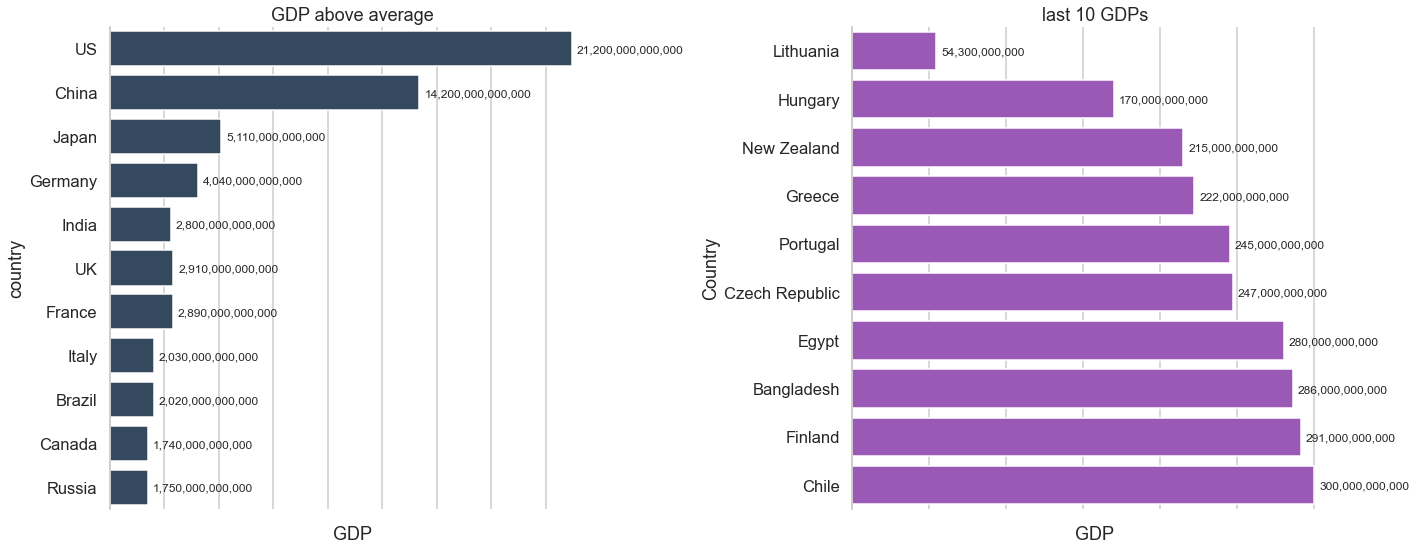

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

g = sns.barplot(x="GDP", y="country", data=data[data['GDP'] > np.mean(data['GDP'])], 
                color=sns.color_palette()[0], saturation=1., ax = axes[0])

datalabel_hbar(g)
g.xaxis.set_ticklabels([])
g.set(xlabel='GDP', ylabel='country')
g.set_title("GDP above average")

h = sns.barplot(x="GDP", y="country", data=data.sort_values(by = 'GDP', ascending = True).iloc[:10], 
                color=sns.color_palette()[1], saturation=1., ax = axes[1])

datalabel_hbar(h)
h.xaxis.set_ticklabels([])
h.set(xlabel='GDP', ylabel='Country')
h.set_title("last 10 GDPs")

sns.despine(bottom=True)
plt.tight_layout()

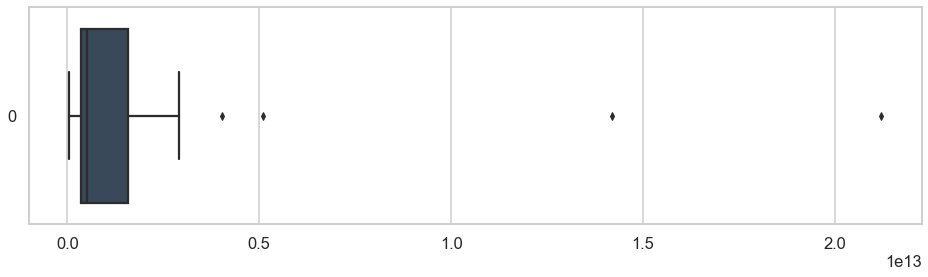

In [17]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.boxplot(data=data['GDP'],orient='h')
plt.show()

In [18]:
data.sort_values(by = 'GDP', ascending = False)[:4]

,country,population,GDP,unemployment %,inflation %,food_inflation %,gold_tons,govt_debt,income_tax %
0,US,329,"21,200,000,000,000",4,2,2,"8,133","22,700,000,000,000",37
1,China,"1,400","14,200,000,000,000",6,4,18,"1,948","7,170,000,000,000",45
2,Japan,126,"5,110,000,000,000",2,0,1,765,"12,200,000,000,000",56
3,Germany,83,"4,040,000,000,000",3,1,4,"3,367","2,420,000,000,000",45


As it can be seen, US, China, Japan and Germany have significantly higher economic output compared to the rest of the countries. These countries can be descriebed as economic powerhouses & major global players. It can be said that these countries have robust economies and contribute significantly to the world's economic activities.

#### GDP and population

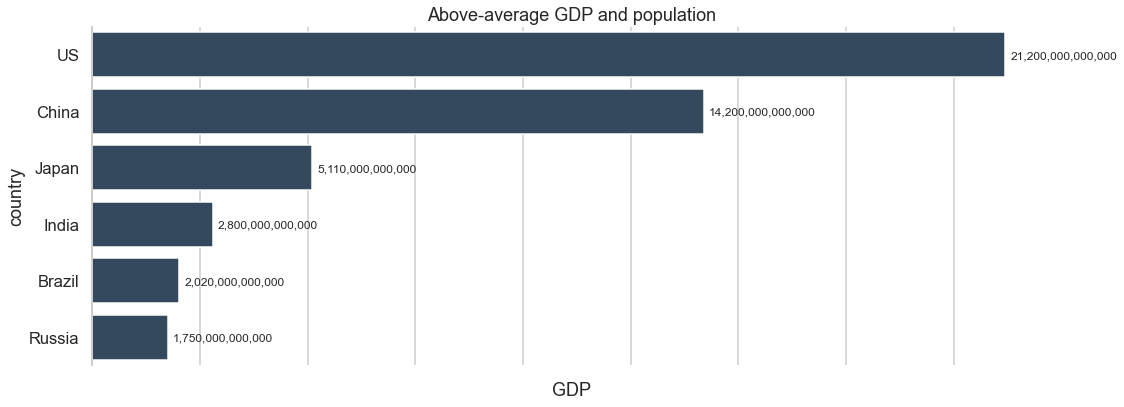

In [19]:
fig, ax = plt.subplots(figsize=(16, 6))

a = sns.barplot(x="GDP", y="country", data=data[(data['GDP'] > np.mean(data['GDP'])) & 
                                                   (data['population'] > np.mean(data['population']))], 
                color=sns.color_palette()[0], saturation=1.,)

datalabel_hbar(a)
a.xaxis.set_ticklabels([])
a.set(xlabel='GDP', ylabel='country')
a.set_title("Above-average GDP and population")

sns.despine(bottom=True)
plt.tight_layout()

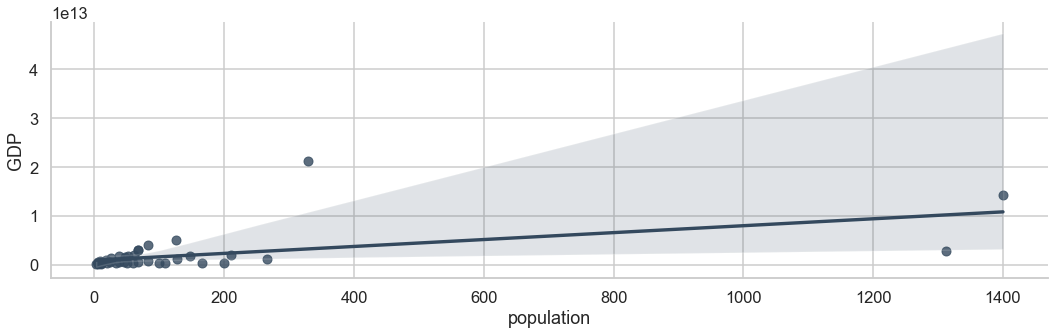

In [60]:
sns.lmplot(x='population',y='GDP',data=data, height = 5, aspect = 3)
plt.show()

In [21]:
data['GDP'].corr(data['population'])

0.5330809670087324

From the plot above it can be seen that there is a positive correlation between a high GDP and a high population. This correlation can be explained by the following:

* Countries with larger populations tend to have a larger pool of potential workers. A larger workforce can lead to increased productivity and more economic output, thus positively influencing GDP;
* A larger population means more potential consumers for goods and services, leading to increased demand and economic activity;
* Countries with higher populations often represent larger markets for businesses, attracting investments and fostering economic growth;
* Larger populations can mean a greater pool of talent and skilled individuals, which can further boost innovation and economic development;

#### GDP and income taxes

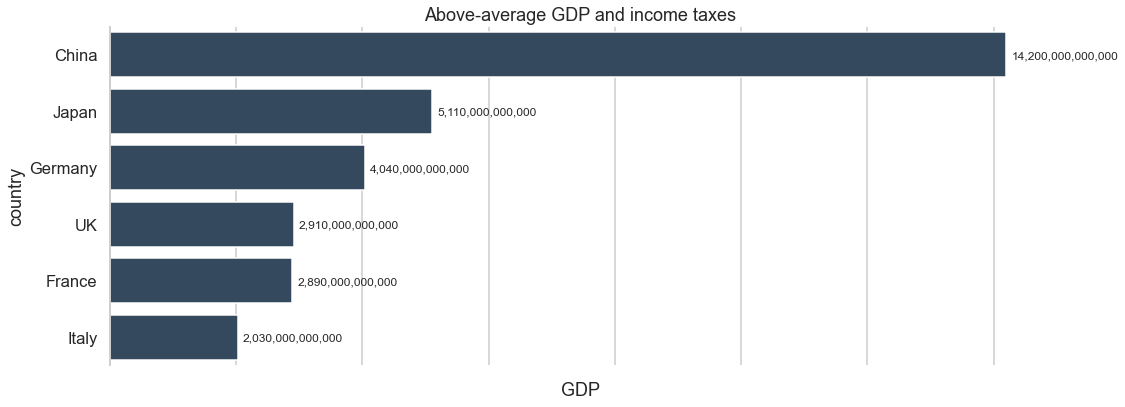

In [22]:
fig, ax = plt.subplots(figsize=(16, 6))

a = sns.barplot(x="GDP", y="country", data=data[(data['GDP'] > np.mean(data['GDP'])) & 
                                                   (data['income_tax %'] > np.mean(data['income_tax %']))], 
                color=sns.color_palette()[0], saturation=1.,)

datalabel_hbar(a)
a.xaxis.set_ticklabels([])
a.set(xlabel='GDP', ylabel='country')
a.set_title("Above-average GDP and income taxes")

sns.despine(bottom=True)
plt.tight_layout()

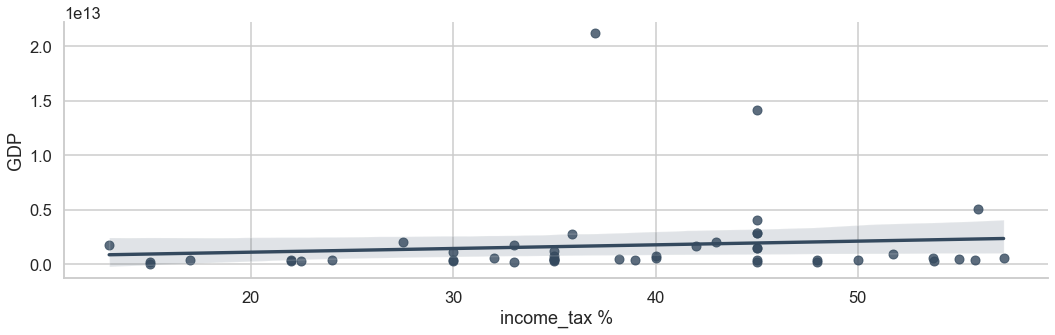

In [61]:
sns.lmplot(x='income_tax %',y='GDP',data=data, height = 5, aspect = 3)
plt.show()

In [25]:
data['GDP'].corr(data['income_tax %'])

0.10822005770515075

In this case, we cannot talk about a significant correlation between GDP and income taxes. As it can be observed, the USA and India cannot be found in the above query. Despite having a GDP well above the global average, taxes in the USA and India are quite low. Countries that have a high GDP but low income taxes are often seen as having favorable economic conditions in terms of wealth generation and economic activity. This combination can lead to several potential implications:

* Low income taxes can stimulate economic growth by leaving more money in the hands of individuals and businesses, which can be used for consumption, investment, and entrepreneurship;
* Lower income taxes can attract foreign direct investment (FDI) and encourage businesses to establish operations within the country. Investors may find it more appealing to allocate their resources in regions with a business-friendly tax environment;
* Lower income taxes can make a country more competitive globally, as it allows businesses to be more cost-effective and potentially offer competitive pricing for goods and services;
* With increased economic activity and investment, there may be more job opportunities and reduced unemployment rates;
* Lower income taxes mean individuals retain more of their earnings, resulting in higher disposable income, which can lead to increased consumer spending;

Countries with a high GDP and low income taxes can present opportunities for economic growth and competitiveness, but the overall economic impact depends on multiple factors, not only GDP and income taxes.

## Inflation

Inflation is defined as the increase in the general price level of goods and services within an economy over time. It results in a decrease in the purchasing power of currency, meaning the same amount of money can buy fewer goods and services. Various factors, such as heightened demand or increased production costs, contribute to inflation. While moderate inflation can have some positive impacts, excessive inflation can lead to economic instability. 

In [26]:
pd.DataFrame(data['inflation %'].describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
inflation %,47,3,7,-1,0,2,4,47


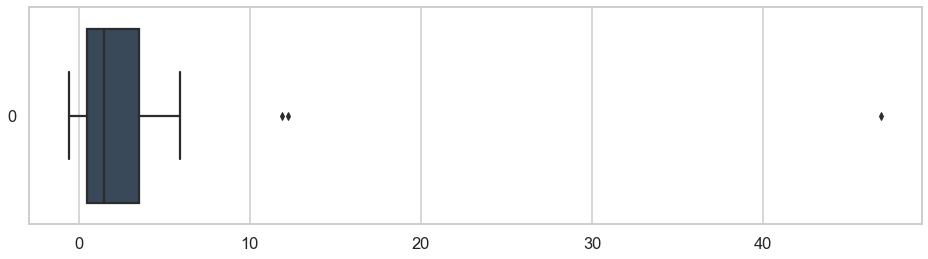

In [27]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.boxplot(data=data['inflation %'],orient='h')
plt.show()

In [28]:
data.sort_values(by = 'inflation %', ascending = False).iloc[:3]

,country,population,GDP,unemployment %,inflation %,food_inflation %,gold_tons,govt_debt,income_tax %
24,Argentina,45,"450,000,000,000",9,47,54,62,"388,000,000,000",35
25,Nigeria,200,"410,000,000,000",23,12,15,21,"71,750,000,000",24
17,Turkey,83,"740,000,000,000",14,12,10,385,"245,000,000,000",35


High inflation rates, also known as hyperinflation, represent an extreme and rapid increase in the general price level of goods and services in an economy. In a hyperinflationary scenario, prices can skyrocket at an astonishing pace, often exceeding 50% per month. This results in a severe loss of purchasing power for the currency, leading to a breakdown of the normal functioning of the economy.

In [29]:
data.sort_values(by = 'inflation %', ascending = True)[:9]

,country,population,GDP,unemployment %,inflation %,food_inflation %,gold_tons,govt_debt,income_tax %
23,Thailand,67,"520,000,000,000",1,-1,2,154,"217,000,000,000",35
18,Switzerland,9,"715,000,000,000",3,-0,-0,"1,040","293,000,000,000",40
31,Malaysia,33,"370,000,000,000",3,-0,1,39,"192,000,000,000",30
20,Taiwan,24,"605,000,000,000",4,-0,2,424,"187,000,000,000",40
43,Greece,11,"222,000,000,000",16,0,-0,113,"392,000,000,000",45
42,Portugal,10,"245,000,000,000",7,0,1,383,"288,000,000,000",48
29,Israel,9,"375,000,000,000",3,0,-0,0,"225,000,000,000",50
12,Spain,47,"1,460,000,000,000",14,0,2,282,"1,390,000,000,000",45
32,Singapore,6,"382,000,000,000",2,0,2,127,"482,000,000,000",22


An inflation rate equal to 0 or below is known as "deflation" or "negative inflation." It occurs when the general price level of goods and services in an economy declines over a specific period. Deflation is the opposite of inflation, where prices generally rise over time.

But while a short period of mild deflation may not be harmful, a prolonged and severe deflationary environment can have significant negative consequences for an economy. 

#### Inflation and unemployment

In [30]:
data['inflation %'].corr(data['unemployment %'])

0.2260214127534998

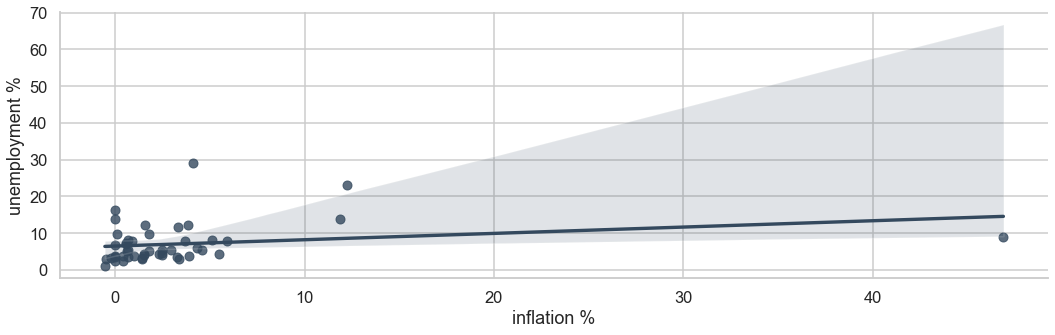

In [62]:
sns.lmplot(x='inflation %',y='unemployment %',data=data, height = 5, aspect = 3)
plt.show()

A correlation coefficient of 0.22 suggests a relatively weak relationship between inflation and unemployment. While there is a positive association, it is not strong enough to make significant predictions based on this correlation alone.

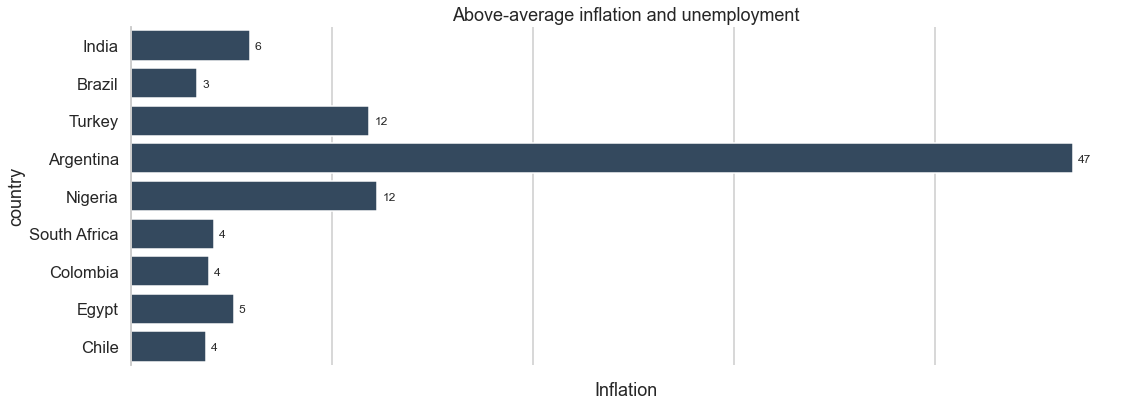

In [32]:
fig, ax = plt.subplots(figsize=(16, 6))

a = sns.barplot(x="inflation %", y="country", data=data[(data['inflation %'] > np.mean(data['inflation %'])) 
                                                           & (data['unemployment %'] > np.mean(data['unemployment %']))], 
                color=sns.color_palette()[0], saturation=1.,)

datalabel_hbar(a)
a.xaxis.set_ticklabels([])
a.set(xlabel='Inflation', ylabel='country')
a.set_title("Above-average inflation and unemployment")

sns.despine(bottom=True)
plt.tight_layout()

A combination of high inflation and a high unemployment rate is often referred to as stagflation. Stagflation is an economic phenomenon characterized by a rare and challenging situation in which an economy experiences stagnant economic growth (high unemployment or recession) alongside rising prices (high inflation).

Stagflation can be caused by various factors, such as supply-side shocks (e.g., sudden increase in oil prices), structural imbalances in the economy, and inadequate monetary or fiscal policies. It is considered a complex and difficult economic situation to manage, as it requires a careful balancing act to address both inflation and unemployment effectively.

## Unemployment

Unemployment refers to a situation in which individuals who are willing and able to work are unable to find gainful employment. It is a key economic indicator that reflects the number or percentage of people within the labor force who are actively seeking employment but are currently without a job.

In [33]:
pd.DataFrame(data['unemployment %'].describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
unemployment %,47,7,5,1,4,5,8,29


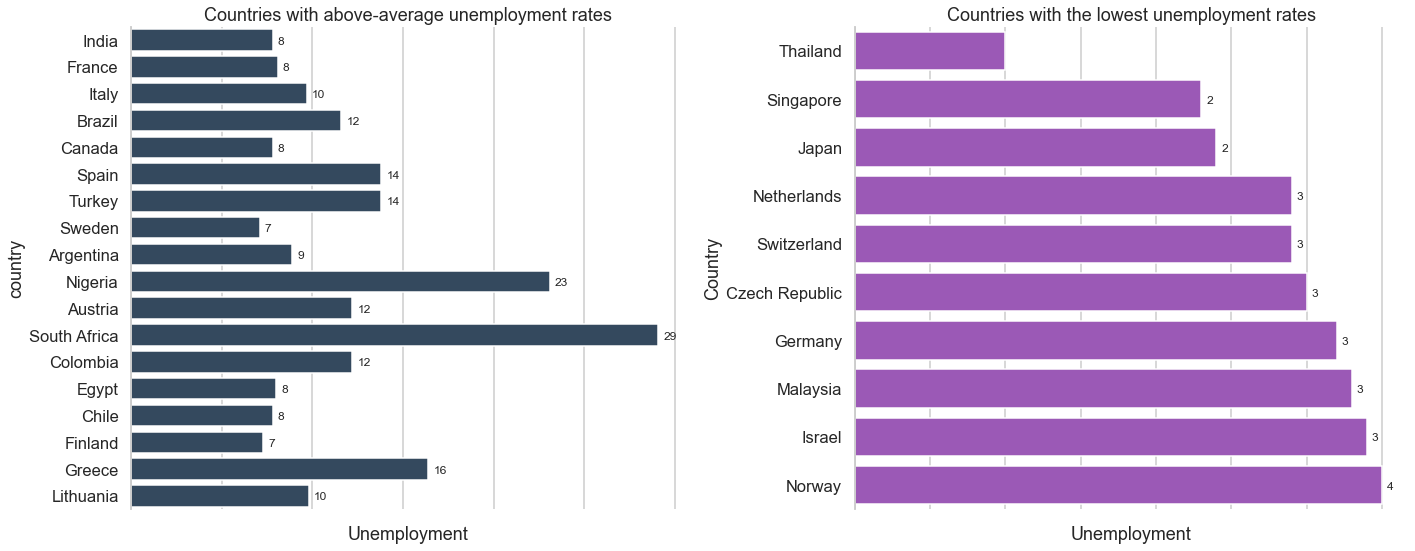

In [66]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

gold = sns.barplot(x="unemployment %", y="country", data=data[data['unemployment %'] > np.mean(data['unemployment %'])], 
                color=sns.color_palette()[0], saturation=1., ax = axes[0])

datalabel_hbar(gold)
gold.xaxis.set_ticklabels([])
gold.set(xlabel='Unemployment', ylabel='country')
gold.set_title("Countries with above-average unemployment rates")

h = sns.barplot(x="unemployment %", y="country", data=data.sort_values(by = 'unemployment %', ascending = True).iloc[:10], 
                color=sns.color_palette()[1], saturation=1., ax = axes[1])

datalabel_hbar(h)
h.xaxis.set_ticklabels([])
h.set(xlabel='Unemployment', ylabel='Country')
h.set_title("Countries with the lowest unemployment rates")

sns.despine(bottom=True)
plt.tight_layout()

* A high unemployment rate often indicates economic challenges, such as a recession or a period of slow economic growth. When businesses are not expanding or are contracting, they may reduce their workforce, leading to higher unemployment;

* Unemployed individuals have lower or no income, which can lead to reduced consumer spending. This, in turn, can negatively affect businesses and economic growth;

* On the other hand, an unemployment rate of 1 - 4 % is exceptionally low and is generally considered a very positive economic indicator. Such a low unemployment rate suggests a robust and healthy economy with a high level of job creation and opportunities for workers. It often indicates a strong demand for labor, where most people who want to work can easily find employment.

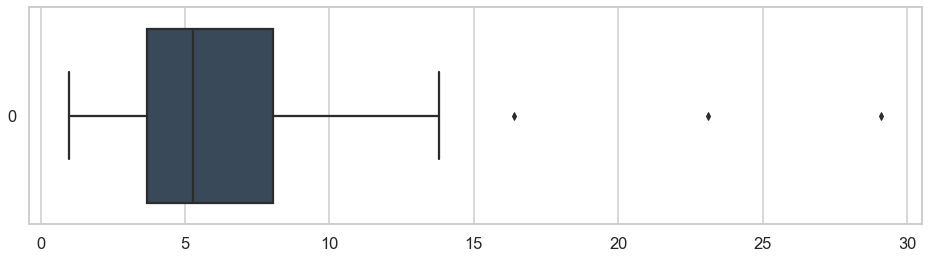

In [35]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.boxplot(data=data['unemployment %'],orient='h')
plt.show()

In [36]:
data.sort_values(by = 'unemployment %', ascending = False)[:3]

,country,population,GDP,unemployment %,inflation %,food_inflation %,gold_tons,govt_debt,income_tax %
34,South Africa,59,"350,000,000,000",29,4,4,125,"218,000,000,000",45
25,Nigeria,200,"410,000,000,000",23,12,15,21,"71,750,000,000",24
43,Greece,11,"222,000,000,000",16,0,-0,113,"392,000,000,000",45


## Income Taxes

Income taxes are a type of tax imposed by governments on individuals and businesses based on their income or profits. They are a significant source of revenue for governments and are used to fund public services, infrastructure, social programs, defense, and various other government expenditures.

In [38]:
pd.DataFrame(data['income_tax %'].describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
income_tax %,47,38,12,13,31,38,45,57


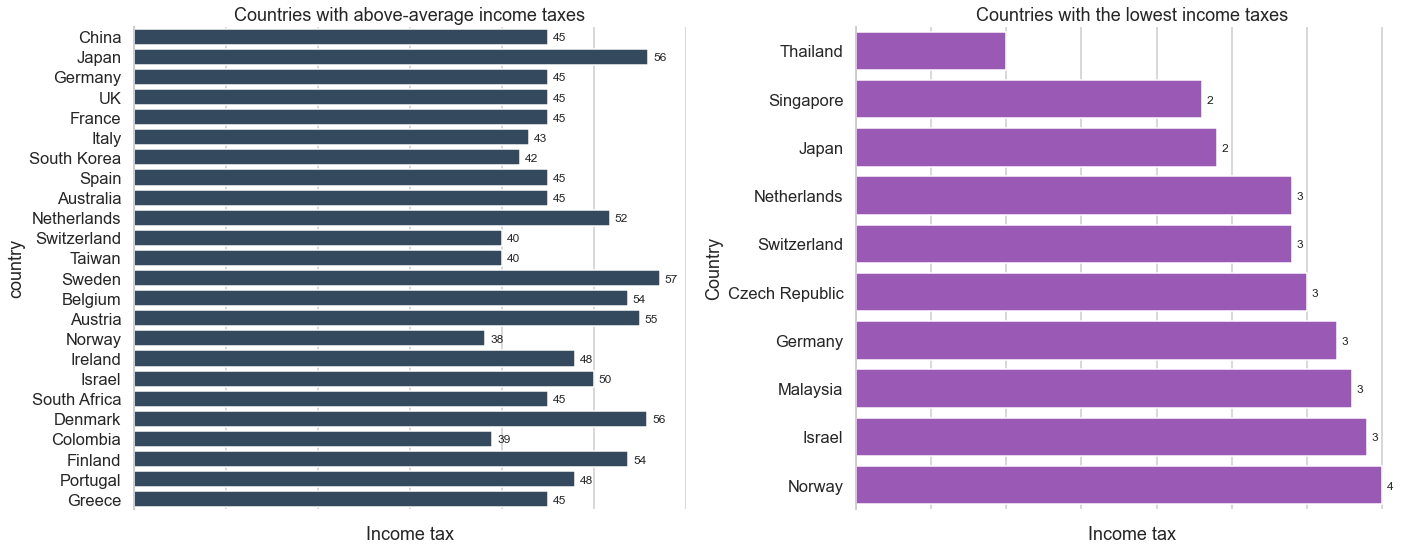

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

gold = sns.barplot(x="income_tax %", y="country", data=data[data['income_tax %'] > np.mean(data['income_tax %'])], 
                color=sns.color_palette()[0], saturation=1., ax = axes[0])

datalabel_hbar(gold)
gold.xaxis.set_ticklabels([])
gold.set(xlabel='Income tax', ylabel='country')
gold.set_title("Countries with above-average income taxes")

h = sns.barplot(x="unemployment %", y="country", data=data.sort_values(by = 'unemployment %', ascending = True).iloc[:10], 
                color=sns.color_palette()[1], saturation=1., ax = axes[1])

datalabel_hbar(h)
h.xaxis.set_ticklabels([])
h.set(xlabel='Income tax', ylabel='Country')
h.set_title("Countries with the lowest income taxes")

sns.despine(bottom=True)
plt.tight_layout()

* Higher tax rates on individuals and businesses with higher incomes mean more money flowing into government coffers. This revenue is then used to fund various public services, infrastructure projects, social welfare programs, education, healthcare, defense, and other government expenditures;
* Also, higher tax rates can discourage work, investment, and entrepreneurship, leading to reduced economic activity and job creation;
* High income taxes can be seen as an investment in public services and infrastructure. The revenue collected can be used to build and maintain roads, bridges, public transportation, schools, and other essential services that benefit society as a whole;
* Lower tax rates can provide individuals with more disposable income, and businesses with higher after-tax profits, encouraging them to spend, save, and invest, which can stimulate economic growth and job creation;
* Countries or regions with low income tax rates may attract foreign investment and businesses seeking a favorable tax environment. This can lead to increased economic activity and job opportunities in the area;
* Low income taxes may be seen as supportive of entrepreneurship and innovation. Entrepreneurs may be more willing to take risks and start new ventures when they can retain a larger share of their earnings;
* Low income taxes can exacerbate income inequality, as they may disproportionately benefit higher-income individuals who can afford to save or invest more of their income. This may lead to a concentration of wealth among the wealthy;
* Low income taxes point out that they can lead to reduced government revenue, which may limit funding for public services, infrastructure, and social programs. This could impact the quality and availability of essential services for citizens.

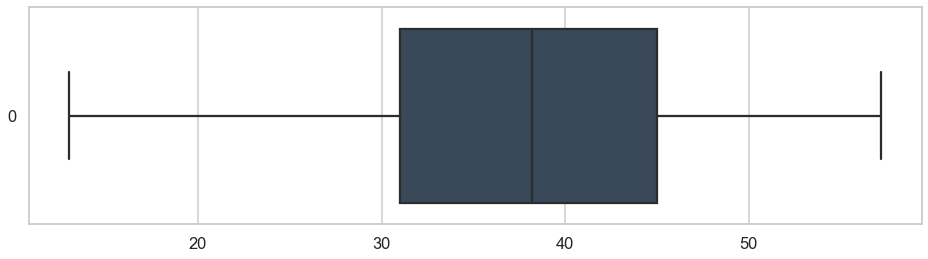

In [40]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.boxplot(data=data['income_tax %'],orient='h')
plt.show()

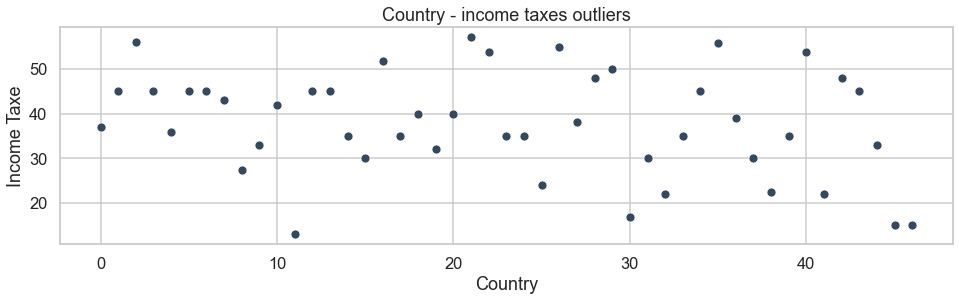

In [67]:
# In depth visualization for outliers

fig, ax = plt.subplots(figsize=(16, 4))

sorted_data = data.sort_values(by='income_tax %', ascending=False)

sns.scatterplot(x=sorted_data.index, y=sorted_data['income_tax %'], alpha=1)

plt.xlabel('Country')
plt.ylabel('Income Taxe')
plt.title('Country - income taxes outliers')

plt.show()

#### Income tax and government debt

In [41]:
data['income_tax %'].corr(data['govt_debt'])

0.15469983068829038

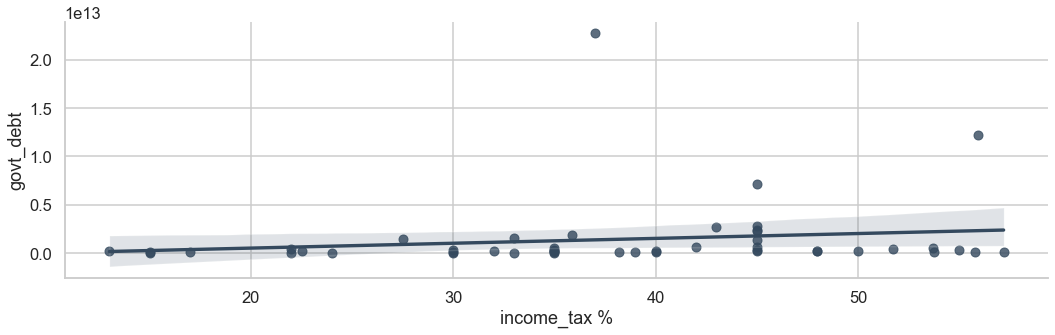

In [63]:
sns.lmplot(x='income_tax %',y='govt_debt',data=data, height = 5, aspect = 3)
plt.show()

There is a weak positive correlation between income taxes and government debt, but this is heavily influenced by countries like the USA, China, and Japan, which have significantly higher government debts compared to other states.

#### High taxes and low GDP

In [69]:
data[(data['income_tax %'] > np.mean(data['income_tax %'])) & 
     (data['GDP'] < np.mean(data['GDP']))].sort_values(by = "income_tax %", ascending = False)

,country,population,GDP,unemployment %,inflation %,food_inflation %,gold_tons,govt_debt,income_tax %
21,Sweden,10,"575,000,000,000",7,1,2,126,"202,000,000,000",57
35,Denmark,6,"352,000,000,000",4,0,1,67,"117,000,000,000",56
26,Austria,9,"459,000,000,000",12,2,2,280,"323,000,000,000",55
40,Finland,6,"291,000,000,000",7,1,2,49,"173,000,000,000",54
22,Belgium,11,"532,000,000,000",5,1,2,227,"525,000,000,000",54
16,Netherlands,17,"915,000,000,000",3,1,3,612,"445,000,000,000",52
29,Israel,9,"375,000,000,000",3,0,-0,0,"225,000,000,000",50
42,Portugal,10,"245,000,000,000",7,0,1,383,"288,000,000,000",48
28,Ireland,5,"381,000,000,000",5,1,-2,6,"224,000,000,000",48
43,Greece,11,"222,000,000,000",16,0,-0,113,"392,000,000,000",45


* High taxes with low GDP might indicate inefficiencies in the economy. Excessive tax burdens can discourage investment, consumption, and economic activity, leading to slower economic growth and lower GDP;
*  High taxes might be used to fund ambitious government spending programs, even if they don't always result in significant GDP growth. In such cases, the focus might be on improving social welfare or investing in long-term projects that don't immediately boost GDP;
* Low GDP despite high taxes could be a result of structural issues in the economy, such as a reliance on declining industries, insufficient investment in innovation, or inadequate infrastructure;
* Some countries may rely heavily on a single industry or a few key sectors. If these industries face challenges, such as fluctuations in commodity prices or global demand, the GDP may remain low despite high taxes.

## Debt

In [44]:
pd.DataFrame(data['govt_debt'].describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
govt_debt,47,"1,448,430,180,851","3,781,175,821,915","19,710,900,000","185,000,000,000","278,000,000,000","636,500,000,000","22,700,000,000,000"


The relatively high standard deviation of approximately 3.78 trillion USD suggests a considerable variability in government debt levels among these countries. Some countries likely have significantly higher government debt levels than the mean, while others have substantially lower government debts. This wide variation in government debt indicates disparities in fiscal management and economic conditions among the countries included in the dataset.

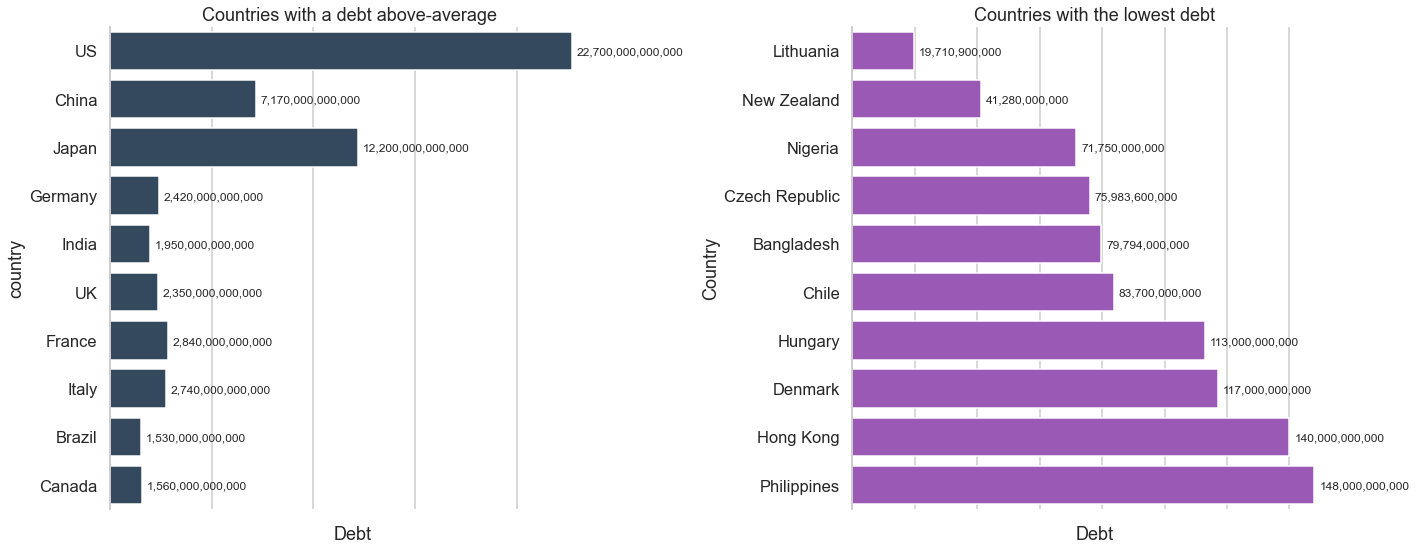

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

gold = sns.barplot(x="govt_debt", y="country", data=data[data['govt_debt'] > np.mean(data['govt_debt'])], 
                color=sns.color_palette()[0], saturation=1., ax = axes[0])

datalabel_hbar(gold)
gold.xaxis.set_ticklabels([])
gold.set(xlabel='Debt', ylabel='country')
gold.set_title("Countries with a debt above-average ")

h = sns.barplot(x="govt_debt", y="country", data=data.sort_values(by = 'govt_debt', ascending = True).iloc[:10], 
                color=sns.color_palette()[1], saturation=1., ax = axes[1])

datalabel_hbar(h)
h.xaxis.set_ticklabels([])
h.set(xlabel='Debt', ylabel='Country')
h.set_title("Countries with the lowest debt")

sns.despine(bottom=True)
plt.tight_layout()

* Government debt arises when a government's expenses (expenditures on programs, services, infrastructure, etc.) exceed its revenues (taxes, fees, etc.) in a given fiscal year. The shortfall leads to a budget deficit, and if this persists year after year, it leads to an accumulation of debt;
* The level of government debt is often assessed in relation to a country's Gross Domestic Product (GDP), which is the total value of all goods and services produced within the country's borders. The debt-to-GDP ratio indicates the percentage of a country's GDP that is represented by its government debt. A higher debt-to-GDP ratio can be a cause for concern as it indicates a heavier debt burden relative to the country's economic output;
* High government debt can have various implications for an economy. Excessive debt may lead to reduced investor confidence and credit ratings, which can result in higher interest rates on government debt, making it more expensive for the government to borrow money. This can create a negative cycle of increasing debt and higher interest payments;
*  High debt levels limit a government's ability to respond to economic downturns or crises effectively. When facing economic challenges, governments may need to implement austerity measures (cutting spending) or raise taxes to manage their debt load, which can have adverse effects on economic growth and public welfare.

High government debt is generally considered negative because it can lead to reduced funds for essential services, economic instability, and higher interest costs. However, if the borrowed funds are used wisely for productive projects and the economy is growing, the debt burden may be more manageable. Responsible fiscal management and effective economic policies are crucial to tackle the challenges of high government debt.

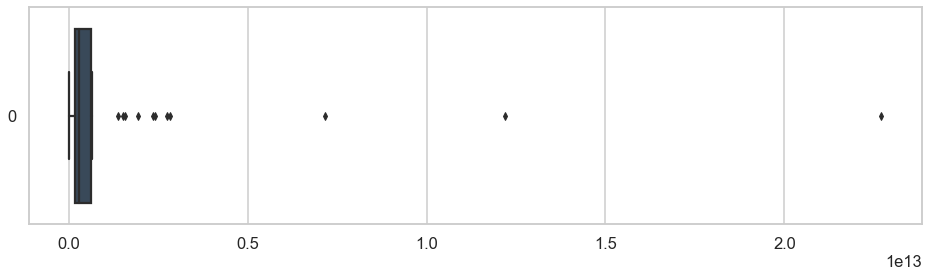

In [46]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.boxplot(data=data['govt_debt'],orient='h')
plt.show()

In [47]:
data.sort_values(by = 'govt_debt', ascending = False)[:11]

,country,population,GDP,unemployment %,inflation %,food_inflation %,gold_tons,govt_debt,income_tax %
0,US,329,"21,200,000,000,000",4,2,2,"8,133","22,700,000,000,000",37
2,Japan,126,"5,110,000,000,000",2,0,1,765,"12,200,000,000,000",56
1,China,"1,400","14,200,000,000,000",6,4,18,"1,948","7,170,000,000,000",45
6,France,67,"2,890,000,000,000",8,1,2,"2,436","2,840,000,000,000",45
7,Italy,60,"2,030,000,000,000",10,0,1,"2,452","2,740,000,000,000",43
3,Germany,83,"4,040,000,000,000",3,1,4,"3,367","2,420,000,000,000",45
5,UK,67,"2,910,000,000,000",4,2,1,310,"2,350,000,000,000",45
4,India,"1,312","2,800,000,000,000",8,6,9,619,"1,950,000,000,000",36
9,Canada,38,"1,740,000,000,000",8,1,2,0,"1,560,000,000,000",33
8,Brazil,210,"2,020,000,000,000",12,3,5,67,"1,530,000,000,000",28


* Some countries use their debt to finance productive investments in infrastructure, education, healthcare, and technology. These investments can enhance the country's productivity, stimulate economic growth, and generate sufficient returns to manage the debt burden effectively;

* Countries with strong and stable political institutions tend to attract investments and maintain economic stability despite high debt levels. Sound governance, rule of law, and respect for property rights can foster investor confidence and economic growth;

* Countries with abundant natural resources, such as oil, minerals, or agricultural products, may generate significant revenue from exports, which can support their economies even with high debt levels;

* Economies with a diversified range of industries and exports are more resilient to external shocks. Such countries can withstand economic challenges and maintain growth despite high debt;

* Participation in global trade can boost economic growth for debt-laden countries. Export-oriented economies benefit from selling goods and services abroad, generating income that helps manage debt obligations;

* Developed countries often have robust financial systems and access to international capital markets, which can provide liquidity and support economic activities despite high debt;

* A skilled and educated workforce can drive innovation and productivity, supporting economic growth and enabling the country to manage its debt effectively;

* Developed countries are often at the forefront of innovation and technology, which can lead to higher productivity and economic growth.

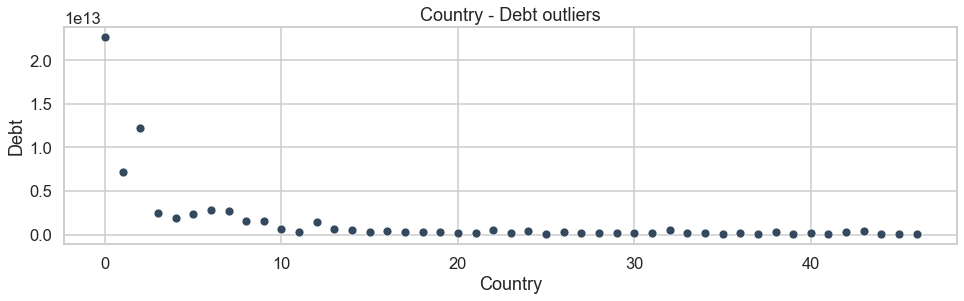

In [48]:
# In depth visualization for outliers

fig, ax = plt.subplots(figsize=(16, 4))

sorted_data = data.sort_values(by='govt_debt', ascending=False)

sns.scatterplot(x=sorted_data.index, y=sorted_data['govt_debt'], alpha=1)

plt.xlabel('Country')
plt.ylabel('Debt')
plt.title('Country - Debt outliers')

plt.show()

Analyzing the above plot, we can state that the most representative outliers in this regard are US, Japan and China.

#### Debt and GDP

In [49]:
data['govt_debt'].corr(data['GDP'])

0.9138019382424941

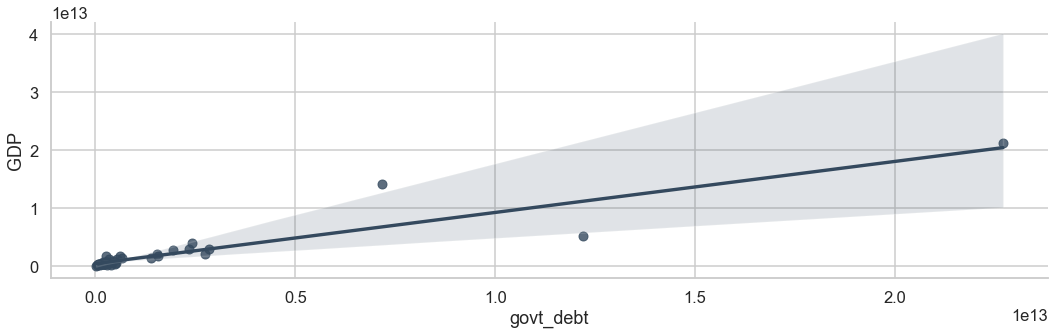

In [64]:
sns.lmplot(x='govt_debt',y='GDP',data=data, height = 5, aspect = 3)
plt.show()

It becomes obvious that the relationship has a positive slope. This means that the richer a country is, the higher the debt level it is able to sustain. A high GDP means a strong economy, which might help manage the debt. However, sustainable debt depends on wise spending and stable finances. Responsible fiscal policies are crucial for long-term stability and growth.

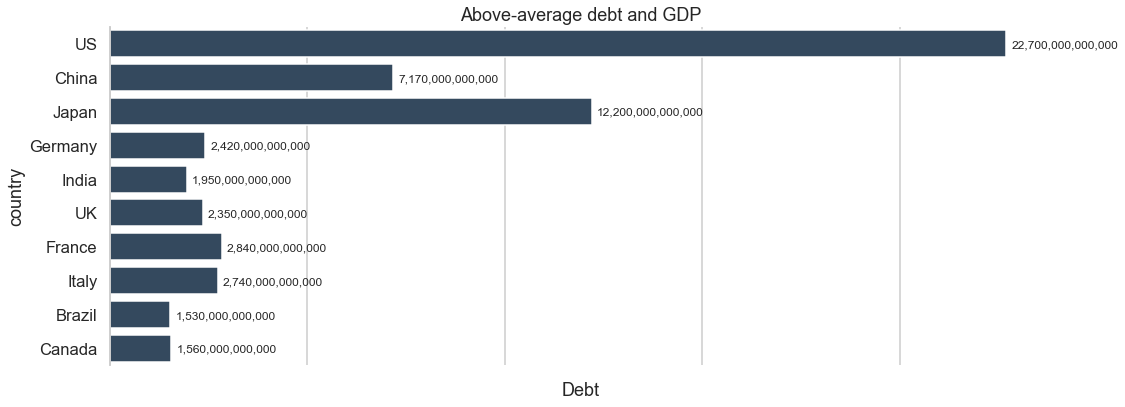

In [51]:
fig, ax = plt.subplots(figsize=(16, 6))

a = sns.barplot(x="govt_debt", y="country", data=data[(data['govt_debt'] > np.mean(data['govt_debt'])) & 
                                                   (data['GDP'] > np.mean(data['GDP']))], 
                color=sns.color_palette()[0], saturation=1.,)

datalabel_hbar(a)
a.xaxis.set_ticklabels([])
a.set(xlabel='Debt', ylabel='country')
a.set_title("Above-average debt and GDP")

sns.despine(bottom=True)
plt.tight_layout()

## Gold reserves

The gold reserves of countries vary widely based on their economic size, historical gold accumulation, and monetary policies. Gold reserves can be used as a part of a country's monetary policy to stabilize its currency and can act as a form of international payment and settlement, especially in times of financial crises when trust in fiat currencies may be diminished, providing a buffer against economic uncertainties and fluctuations.

In [52]:
pd.DataFrame(data['gold_tons'].describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
gold_tons,47,592,"1,361",0,26,120,384,"8,133"


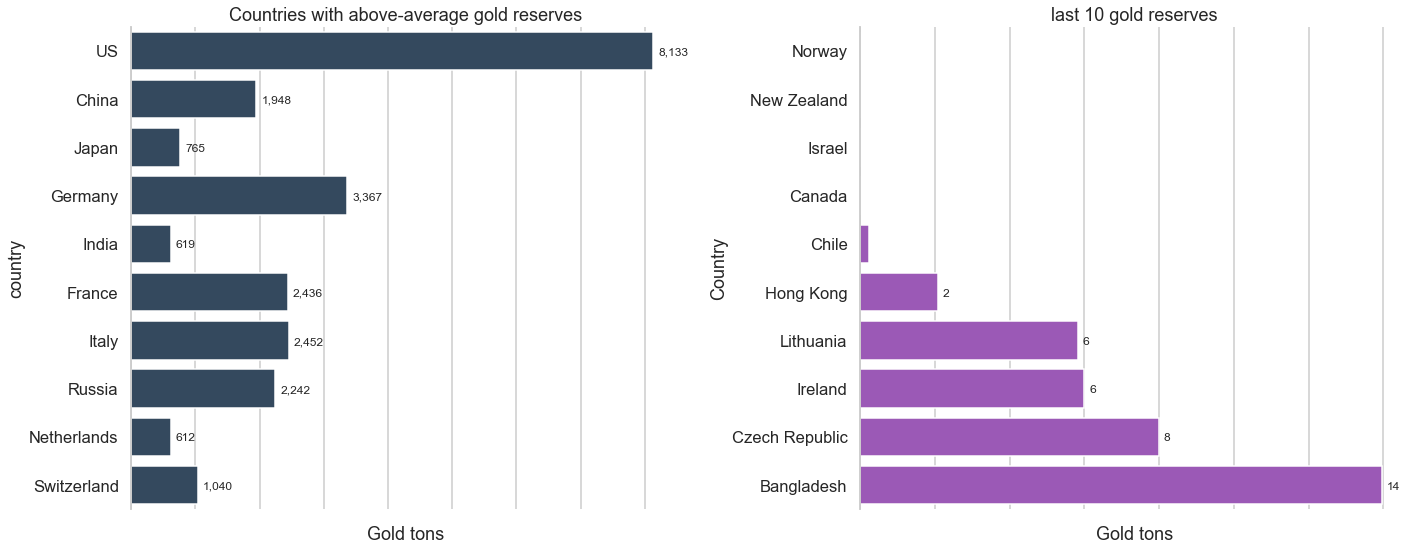

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

gold = sns.barplot(x="gold_tons", y="country", data=data[data['gold_tons'] > np.mean(data['gold_tons'])], 
                color=sns.color_palette()[0], saturation=1., ax = axes[0])

datalabel_hbar(gold)
gold.xaxis.set_ticklabels([])
gold.set(xlabel='Gold tons', ylabel='country')
gold.set_title("Countries with above-average gold reserves")

h = sns.barplot(x="gold_tons", y="country", data=data.sort_values(by = 'gold_tons', ascending = True).iloc[:10], 
                color=sns.color_palette()[1], saturation=1., ax = axes[1])

datalabel_hbar(h)
h.xaxis.set_ticklabels([])
h.set(xlabel='Gold tons', ylabel='Country')
h.set_title("last 10 gold reserves")

sns.despine(bottom=True)
plt.tight_layout()

* Countries with high gold reserves enjoy financial stability, credibility, and flexibility in monetary policy. They have reduced dependency, economic influence, and diversification of assets. Gold reserves also support international payments. 

* Norway, New Zeeland, Israel, Canada...

*  the absence of gold reserves does not necessarily indicate a weak economy or poor financial management. Each country's economic circumstances, financial policies, and geopolitical considerations can vary significantly, leading to different decisions regarding gold reserves.

* Netherlands..Switzerland...maybe colonialism past?

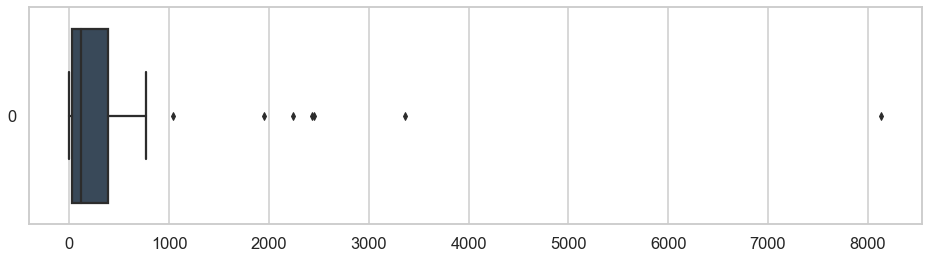

In [54]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.boxplot(data=data['gold_tons'],orient='h')
plt.show()

In [55]:
data.sort_values(by = 'gold_tons', ascending = False)[:7]

,country,population,GDP,unemployment %,inflation %,food_inflation %,gold_tons,govt_debt,income_tax %
0,US,329,"21,200,000,000,000",4,2,2,"8,133","22,700,000,000,000",37
3,Germany,83,"4,040,000,000,000",3,1,4,"3,367","2,420,000,000,000",45
7,Italy,60,"2,030,000,000,000",10,0,1,"2,452","2,740,000,000,000",43
6,France,67,"2,890,000,000,000",8,1,2,"2,436","2,840,000,000,000",45
11,Russia,147,"1,750,000,000,000",5,2,2,"2,242","256,000,000,000",13
1,China,"1,400","14,200,000,000,000",6,4,18,"1,948","7,170,000,000,000",45
18,Switzerland,9,"715,000,000,000",3,-0,-0,"1,040","293,000,000,000",40


Switzerland has a long-standing reputation as a safe haven for wealth and assets during times of geopolitical and economic uncertainties. Gold is often considered a store of value and a hedge against inflation and currency fluctuations. Many investors and central banks around the world view Swiss franc-denominated assets and Swiss-held gold as a reliable option for preserving wealth and maintaining stability.

#### Gold reserves and GDP

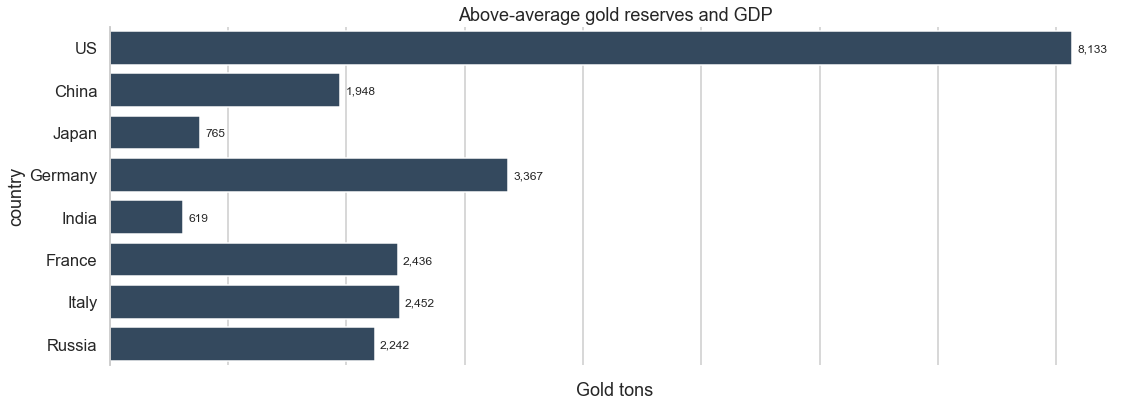

In [56]:
fig, ax = plt.subplots(figsize=(16, 6))

a = sns.barplot(x="gold_tons", y="country", data=data[(data['gold_tons'] > np.mean(data['gold_tons'])) & 
                                                   (data['GDP'] > np.mean(data['GDP']))], 
                color=sns.color_palette()[0], saturation=1.,)

datalabel_hbar(a)
a.xaxis.set_ticklabels([])
a.set(xlabel='Gold tons', ylabel='country')
a.set_title("Above-average gold reserves and GDP")

sns.despine(bottom=True)
plt.tight_layout()

In [57]:
data['GDP'].corr(data['gold_tons'])

0.8434939963604997

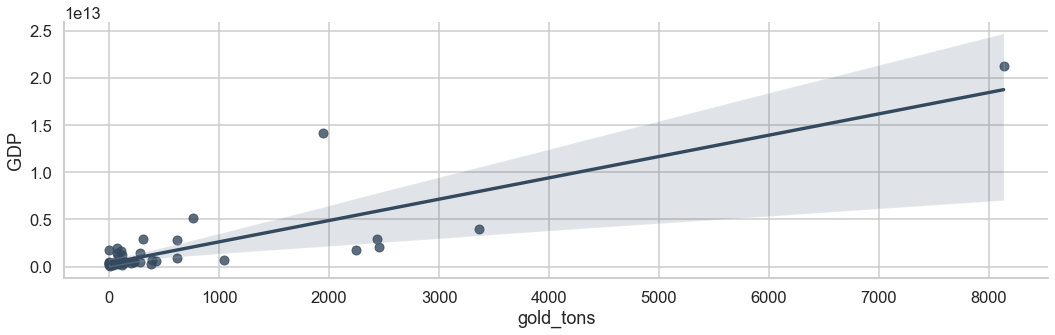

In [65]:
sns.lmplot(x='gold_tons',y='GDP',data=data, height = 5, aspect = 3)
plt.show()

As it can be observed, countries with stronger and more stable economies, may have larger gold reserves (or viceversa). Economic stability attracts investments and leads to higher foreign exchange reserves, including gold. Additionally, wealthier countries with higher GDPs have more resources available for diversifying their assets, which may include holding gold. The perception of economic strength and reliability in the international financial community can also influence investors and central banks to hold a country's currency or assets, including gold reserves. But the correlation between gold reserves and GDP is not universal, and various other factors influence a country's decision to hold gold reserves.

# Conclusions

The **US, China, Japan, and Germany** are economic powerhouses and major global players. With robust economies, they significantly drive world economic activities and trade. Their influence, innovation, and investments shape the global economic landscape, making them crucial players in fostering global prosperity.

**Brazil** has a high GDP, signifying strong economic output. However, the country faces significant challenges, including high inflation, high unemployment rates, and substantial government debt. These factors can obstruct economic growth, increase cost of living, and limit the government's ability to implement effective policies. Addressing these issues requires a balanced approach through monetary policy, fiscal reforms, and targeted measures to stimulate growth and reduce unemployment.

Countries with bigger populations like the **US, China, Japan, Russia, India, and Brazil** can benefit from having more workers and consumers, which boosts economic output and GDP. A larger population also means more potential talent and innovation. However, population size alone doesn't guarantee a better life for people. Effective leadership and good policies are crucial to improve living standards and fully utilize the advantages of a bigger population. In countries where leadership is weak, the benefits of a large population may not be fully realized. Good governance, education, healthcare, and infrastructure are essential for ensuring prosperity and sustainable growth for the people. We can state that the political leadership of **Rusia and India** are not using the advantages of having a large population to benefit the country.

**China, Japan, Germany, Uk, France and Italy** have managed to achieve considerable economic prosperity, but their higher income tax rates could be a reflection of their efforts to fund essential public services, social welfare programs, and infrastructure development. The correlation between above-average GDP and higher income taxes suggests that these countries are striving to strike a balance between economic growth and social well-being by investing in their citizens and communities.

Despite its huge GDP, the **United States** is seen as a country with lower taxes compared to some other developed nations. This is because of its progressive tax system, various deductions and credits, and the ability of corporations to reduce their tax rates through loopholes. State and local taxes can also influence the overall tax situation, making it a subjective evaluation of high or low taxes depending on individual circumstances and regional factors

**Argentina, Nigeria, and Turkey** are facing hyperinflation, which means rapid and extreme price increases for goods and services. This situation reflects economic mismanagement, causing the value of their currencies to drop quickly. People's purchasing power is greatly reduced, leading to challenges in affording basic necessities. We can state that in thsese countires, hyperinflation creates an unstable investment environment, social unrest, and a risk of debt default.

Countries like **Thailand, Switzerland, Malaysia, Taiwan, Greece, Portugal, Israel, Spain and Singapore** are experiencing 0 or below zero inflation, known as deflation. It indicates a situation where prices for goods and services are declining. This can lead to economic weakness, making it difficult for people to repay debts and affecting wages and overall economic growth.

**India, Brazil, Turkey, Argentina, Nigeria, South Africa, Colombia, Egypt and Chile** are experiencing above-average inflation and unemployment face economic instability and imbalances. This situation can lead to rising prices and reduced job opportunities. Policymakers need to find ways to address these issues while ensuring economic growth and stability. It requires careful planning and coordinated efforts to strike a balance between controlling inflation and creating job opportunities.

**Greece's** situation, with low inflation but high unemployment, suggests economic stagnation and challenges. The lack of significant price increases reflects weak consumer demand, while high unemployment indicates a lack of job opportunities. The country may need reforms to stimulate economic growth, create more jobs, and address structural issues within the economy.

**Germany, Switzerland, and the Netherlands** have low income taxes, yet they manage to maintain a high standard of living. This shows that their economies are strong, and they effectively allocate resources to essential services and programs for their citizens. Their success lies in efficient governance and policies that support economic growth and social well-being.

**Sweden, Denmark, Austria, and Finland** have high income taxes but provide good living standards. They prioritize social welfare programs, redistributing wealth to reduce inequality and invest in education and healthcare. This approach leads to stable societies and a higher quality of life for their citizens.

The **US, Japan, and China** have significant debts despite being major global economies. This is due to factors such as high public spending, investment in development, geopolitical considerations, and economic cycles. The US, Japan, and China serve as examples of how even world-leading economies can accumulate significant debts, highlighting the importance of responsible debt management for long-term economic stability and growth.

**Switzerland and the Netherlands** have large gold reserves, which helps them maintain financial stability and protect against economic uncertainties. **Switzerland** has a long-standing reputation as a safe haven for wealth and assets during times of geopolitical and economic uncertainties. This practice aligns with their historical reputation for responsible financial management. Additionally, considering the **Netherlands'** colonial past, their gold reserves might have been influenced by historical and economic factors.